In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

In [53]:
# Variables for coefficients
coef1_sym = symbols('coef1')
coef2_sym = symbols('coef2')
coef3_sym = symbols('coef3')
coef4_sym = symbols('coef4')
coef5_sym = symbols('coef5')
coef6_sym = symbols('coef6')
coef7_sym = symbols('coef7')
coef8_sym = symbols('coef8')

In [54]:
# Basis matrix
t = 15
basis_matrix = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0],
                         [0, 0, 0, 0, 1, 0, 0, 0],
                         [0, 0, 0, 0, 0, 1, 0, 0],
                         [1, t, t**2, t**3, 0, 0, 0, 0],
                         [0, 1, 2 * t, 3 * t**2, 0, 0, 0, 0],
                         [0, 0, 0, 0, 1, t, t**2, t**3],
                         [0, 0, 0, 0, 0, 1, 2 * t, 3 * t**2]])
print(basis_matrix)

[[   1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    1    0    0]
 [   1   15  225 3375    0    0    0    0]
 [   0    1   30  675    0    0    0    0]
 [   0    0    0    0    1   15  225 3375]
 [   0    0    0    0    0    1   30  675]]


In [55]:
# Matrix multiplication using pseudo-inverse
arr = np.array([[0],
                [0],
                [0.5],
                [-1.6],
                [5],
                [5],
                [0.5],
                [-1.6]])
mul = np.linalg.pinv(basis_matrix)
solutions = np.dot(mul, arr)
print(solutions)

[[ 1.59717062e-14]
 [-1.12855714e-15]
 [-2.66666667e-01]
 [ 1.92592593e-02]
 [ 5.00000000e-01]
 [-1.60000000e+00]
 [ 3.20000000e-01]
 [-1.42222222e-02]]


In [56]:
# Coefficients as dictionary
coefficients_dict = {
    coef1_sym: solutions[0, 0],
    coef2_sym: solutions[1, 0],
    coef3_sym: solutions[2, 0],
    coef4_sym: solutions[3, 0],
    coef5_sym: solutions[4, 0],
    coef6_sym: solutions[5, 0],
    coef7_sym: solutions[6, 0],
    coef8_sym: solutions[7, 0]
}

In [57]:
# alpha values as a list
alpha_values = [1.00000000e+00, 1.00000000e+00, -8.00000000e-02, 3.55555556e-03,
                 4.14285794e-13,  1.00000000e+00, -7.33333333e-01, 4.59259259e-02]

In [58]:
# Generate T values
T = np.linspace(0, 15, 100)

In [59]:
# Values of X1 & X3
X1 = alpha_values[0] + alpha_values[1] * T + alpha_values[2] * (T ** 2) + alpha_values[3] * (T ** 3)
X3 = alpha_values[4] + alpha_values[5] * T + alpha_values[6] * (T ** 2) + alpha_values[7] * (T ** 3)

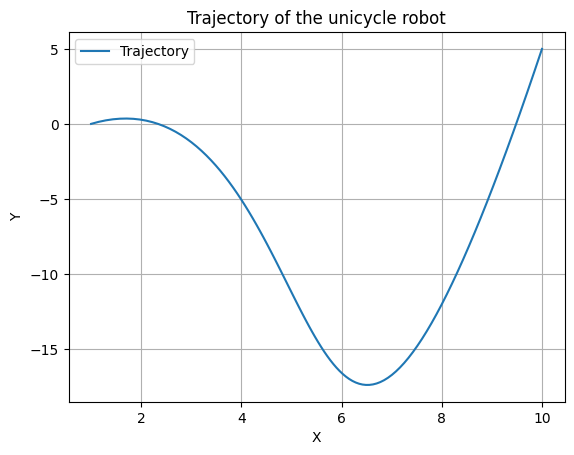

In [60]:
# plot
plt.figure()
plt.plot(X1, X3, label='Trajectory')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory of the unicycle robot')
plt.legend()
plt.grid(True)
plt.show()